# Classification Problem

In [1]:
import pandas as pd
iris_Data=pd.read_csv("Iris.csv")

In [2]:
iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_Data['Species'] = label_encoder.fit_transform(iris_Data['Species'])


In [5]:
iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
iris_Data.shape

(150, 6)

In [7]:
x=iris_Data.iloc[:,1:-1]
y=iris_Data.Species


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [10]:
x_train.shape
#print(type(x_train))
#x_test.shape

(112, 4)

In [11]:
y_test.shape
#print(y_test)

(38,)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from livelossplot import PlotLossesKerasTF

In [19]:
irisModel=Sequential()
#irisModel.add(Input(shape=(4,)))
irisModel.add(Dense(8,input_dim= 4,activation='relu'))
irisModel.add(Dense(6,activation='relu'))
irisModel.add(Dense(4,activation='relu'))
irisModel.add(Dense(3,activation='softmax'))

In [20]:
irisModel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
# We need to convert outcome variable into binary as we are using softmax


In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [23]:
y_test_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

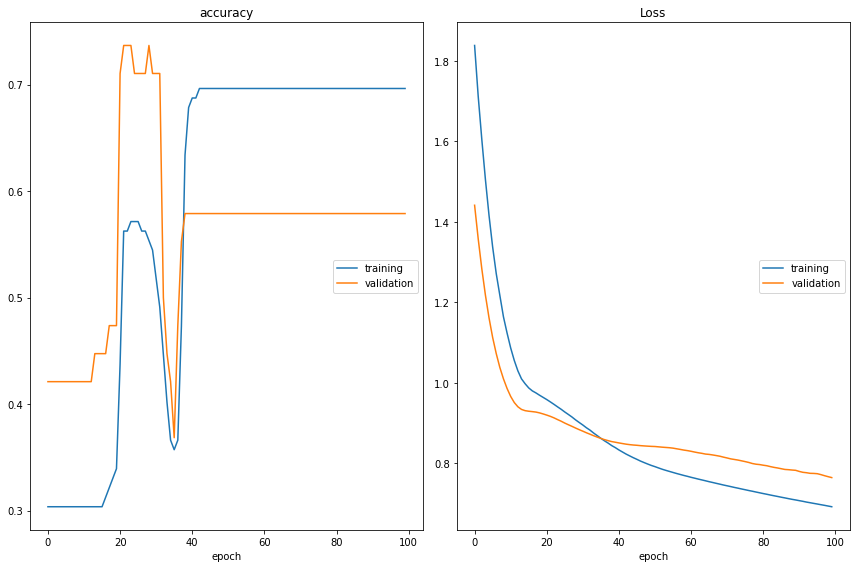

accuracy
	training         	 (min:    0.304, max:    0.696, cur:    0.696)
	validation       	 (min:    0.368, max:    0.737, cur:    0.579)
Loss
	training         	 (min:    0.692, max:    1.838, cur:    0.692)
	validation       	 (min:    0.764, max:    1.441, cur:    0.764)
4/4 [==============================] - 0s 112ms/step - loss: 0.6919 - accuracy: 0.6964 - val_loss: 0.7643 - val_accuracy: 0.5789


In [24]:
irisModel.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])


In [25]:
# Evaluate Method
score = irisModel.evaluate(x_test,y_test_encoded)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

2/2 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.5789
Test loss: 76.4289379119873
Test accuracy: 57.894736528396606


In [26]:
y_train.value_counts()

2    41
0    37
1    34
Name: Species, dtype: int64

# Overfitting: L2 Regularization

In [31]:
from tensorflow.keras.regularizers import l2

In [32]:
irisModel=Sequential()
irisModel.add(Input(shape=(4,)))
irisModel.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(6,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(4,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(3,activation='softmax'))
irisModel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

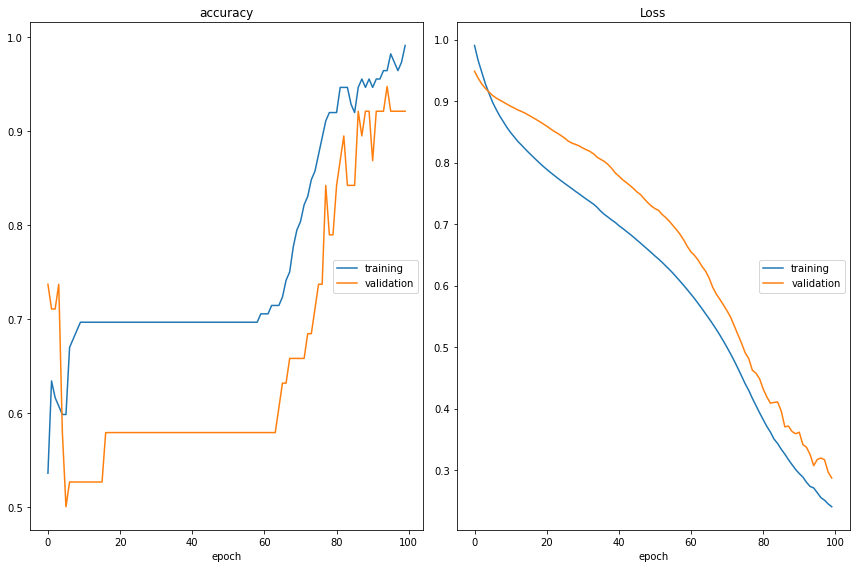

accuracy
	training         	 (min:    0.536, max:    0.991, cur:    0.991)
	validation       	 (min:    0.500, max:    0.947, cur:    0.921)
Loss
	training         	 (min:    0.240, max:    0.990, cur:    0.240)
	validation       	 (min:    0.287, max:    0.949, cur:    0.287)
4/4 [==============================] - 0s 123ms/step - loss: 0.2404 - accuracy: 0.9911 - val_loss: 0.2871 - val_accuracy: 0.9211


In [33]:
irisModel.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

In [34]:
from sklearn.metrics import classification_report

In [35]:
irisModel.predict(x_test)

array([[2.6023952e-06, 8.6258963e-02, 9.1373849e-01],
       [7.0306577e-02, 8.0346024e-01, 1.2623315e-01],
       [9.6262610e-01, 3.6741812e-02, 6.3207577e-04],
       [2.5759824e-05, 2.7942103e-01, 7.2055316e-01],
       [9.5981658e-01, 3.9418563e-02, 7.6489459e-04],
       [5.3474309e-07, 6.7547321e-02, 9.3245214e-01],
       [9.5696545e-01, 4.2118669e-02, 9.1580051e-04],
       [5.0334297e-03, 7.0047927e-01, 2.9448727e-01],
       [6.5067713e-03, 7.3039329e-01, 2.6309994e-01],
       [2.7199283e-02, 7.7791113e-01, 1.9488952e-01],
       [1.7093358e-04, 3.7519774e-01, 6.2463135e-01],
       [5.4449951e-03, 6.8727815e-01, 3.0727687e-01],
       [7.1450374e-03, 7.1455830e-01, 2.7829665e-01],
       [4.0758532e-03, 6.6054016e-01, 3.3538389e-01],
       [2.7137590e-03, 6.1452502e-01, 3.8276124e-01],
       [9.5798534e-01, 4.1154779e-02, 8.5991912e-04],
       [2.3422632e-03, 5.7889229e-01, 4.1876552e-01],
       [5.2787629e-03, 6.4130861e-01, 3.5341260e-01],
       [9.5623642e-01, 4.280

In [36]:
irisModel.predict(x_test).argmax(axis=1)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2])

In [37]:
# Demonstration of argmax
import numpy as np

In [38]:
a=np.array([[120,45,890],[1,5,2],[100,20,23]])

In [39]:
a

array([[120,  45, 890],
       [  1,   5,   2],
       [100,  20,  23]])

In [40]:
a.argmax(axis=1)

array([2, 1, 0])

In [42]:
train_pred=irisModel.predict(x_train).argmax(axis=1)
test_pred=irisModel.predict(x_test).argmax(axis=1)

In [43]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.97      0.99        34
           2       0.98      1.00      0.99        41

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112



In [44]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.81      0.90        16
           2       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38



In [45]:
y_train.value_counts()

2    41
0    37
1    34
Name: Species, dtype: int64

In [46]:
y_test.value_counts()

1    16
0    13
2     9
Name: Species, dtype: int64

# L1 Regularization

In [50]:
# L1 Regularization
from tensorflow.keras.regularizers import l1

In [51]:
irisModel1=Sequential()
irisModel1.add(Input(shape=(4,)))
irisModel1.add(Dense(8,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(6,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(4,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(3,activation='softmax'))
irisModel1.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

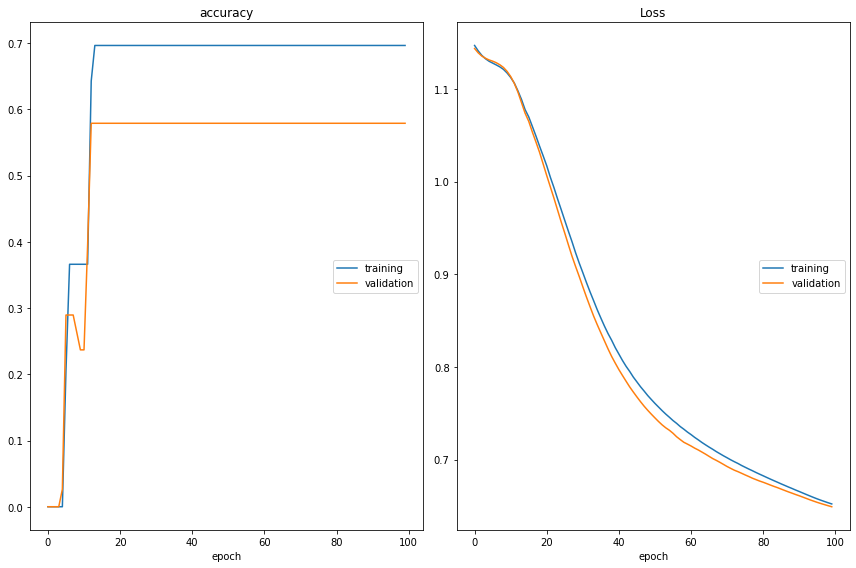

accuracy
	training         	 (min:    0.000, max:    0.696, cur:    0.696)
	validation       	 (min:    0.000, max:    0.579, cur:    0.579)
Loss
	training         	 (min:    0.652, max:    1.147, cur:    0.652)
	validation       	 (min:    0.649, max:    1.144, cur:    0.649)
4/4 [==============================] - 0s 121ms/step - loss: 0.6521 - accuracy: 0.6964 - val_loss: 0.6491 - val_accuracy: 0.5789


In [52]:
irisModel1.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

# Demonstration of Dropout

In [55]:
# Dropout
from tensorflow.keras.layers import Dense, Dropout,Input
irisModel2=Sequential()
irisModel2.add(Input(shape=(4,)))
irisModel2.add(Dense(8,activation='relu'))
irisModel2.add(Dropout(0.30))
irisModel2.add(Dense(6,activation='relu'))
irisModel2.add(Dropout(0.30))
irisModel2.add(Dense(4,activation='relu'))
irisModel2.add(Dropout(0.30))
irisModel2.add(Dense(3,activation='softmax'))
irisModel2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

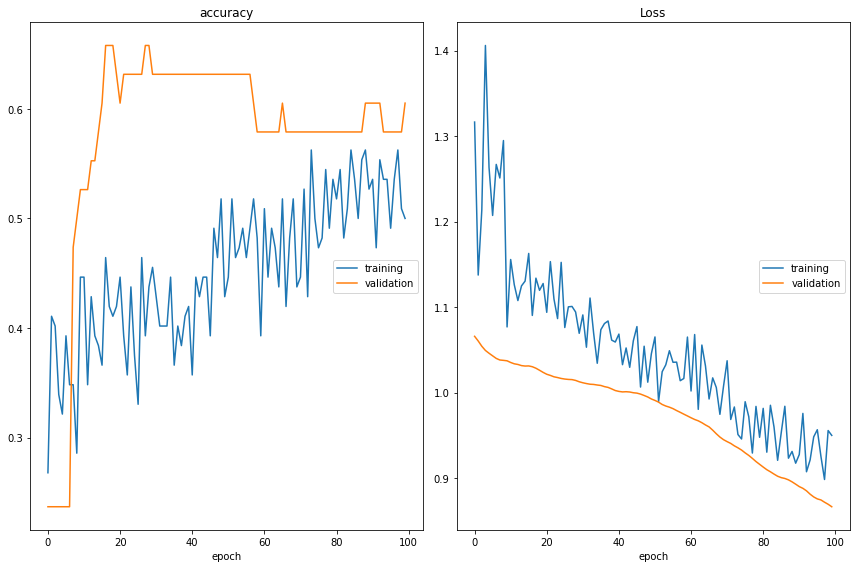

accuracy
	training         	 (min:    0.268, max:    0.562, cur:    0.500)
	validation       	 (min:    0.237, max:    0.658, cur:    0.605)
Loss
	training         	 (min:    0.898, max:    1.406, cur:    0.950)
	validation       	 (min:    0.866, max:    1.066, cur:    0.866)
4/4 [==============================] - 0s 134ms/step - loss: 0.9498 - accuracy: 0.5000 - val_loss: 0.8663 - val_accuracy: 0.6053


In [56]:
irisModel2.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

# Demonstration of Dropout with Regularization

In [53]:
# Dropout
from tensorflow.keras.layers import Dense, Dropout,Input
irisModel3=Sequential()
irisModel3.add(Input(shape=(4,)))
irisModel3.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel3.add(Dropout(0.30))
irisModel3.add(Dense(6,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel3.add(Dropout(0.30))
irisModel3.add(Dense(4,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel3.add(Dropout(0.30))
irisModel3.add(Dense(3,activation='softmax'))
irisModel3.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

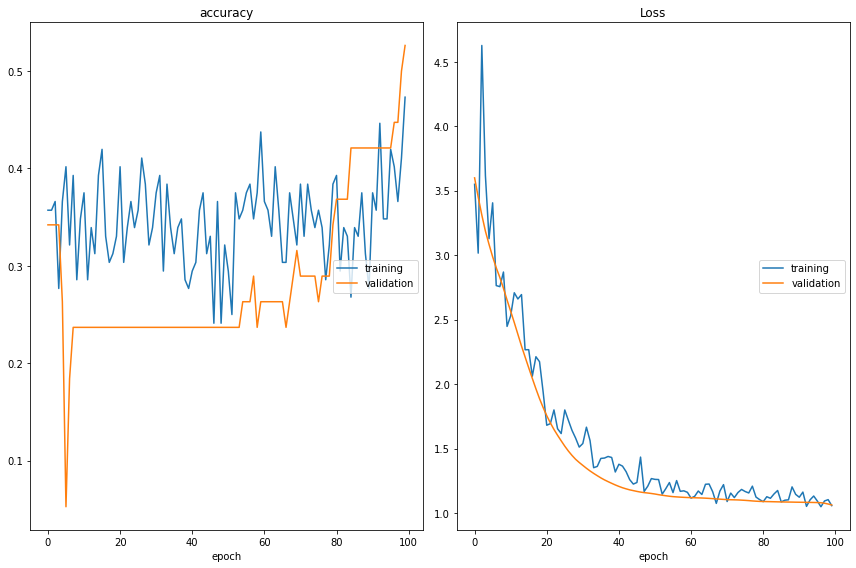

accuracy
	training         	 (min:    0.241, max:    0.473, cur:    0.473)
	validation       	 (min:    0.053, max:    0.526, cur:    0.526)
Loss
	training         	 (min:    1.048, max:    4.626, cur:    1.057)
	validation       	 (min:    1.062, max:    3.599, cur:    1.062)
4/4 [==============================] - 0s 123ms/step - loss: 1.0570 - accuracy: 0.4732 - val_loss: 1.0621 - val_accuracy: 0.5263


In [54]:
irisModel3.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])